In [1]:
import pandas as pd

blame = pd.read_csv("../dataset/linux_blame_log.csv")
blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [2]:
blame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 172.9+ MB


In [3]:
top10 = blame.author.value_counts().head(10)
top10

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

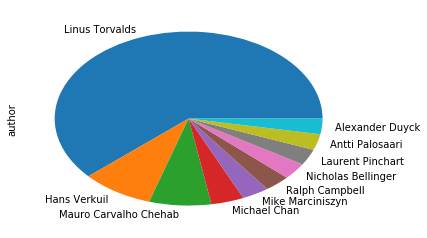

In [4]:
%matplotlib inline
top10.plot.pie()

In [5]:
blame.timestamp = pd.to_datetime(blame.timestamp)
blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [6]:
blame['age'] = pd.Timestamp('today') - blame.timestamp
blame.head()

,path,author,timestamp,line,age
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1036 days 22:35:22.839129
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1036 days 22:35:22.839129
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1036 days 22:35:22.839129
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3291 days 06:43:52.839129
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1036 days 22:35:22.839129


In [11]:
blame['components'] = blame.path.str.split("/").str[0:2].str.join(":")
blame.head()

,path,author,timestamp,line,age,components
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1036 days 22:35:22.839129,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1036 days 22:35:22.839129,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1036 days 22:35:22.839129,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3291 days 06:43:52.839129,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1036 days 22:35:22.839129,drivers:scsi


In [8]:
component_age = blame.groupby('components').age.min().sort_values()
component_age

components
drivers:scsi           169 days 14:03:58.839129
drivers:i2c            169 days 15:24:33.839129
drivers:net            169 days 15:39:49.839129
drivers:of             170 days 07:58:51.839129
drivers:pci            170 days 11:45:46.839129
drivers:s390           171 days 17:11:30.839129
drivers:infiniband     174 days 06:54:24.839129
drivers:block          174 days 14:33:04.839129
drivers:perf           175 days 03:00:32.839129
drivers:cpufreq        175 days 04:46:18.839129
drivers:dax            175 days 08:05:39.839129
drivers:input          175 days 11:08:10.839129
drivers:media          175 days 21:38:52.839129
drivers:mmc            177 days 09:33:04.839129
drivers:thermal        178 days 20:33:42.839129
drivers:hwtracing      182 days 19:23:19.839129
drivers:rtc            183 days 12:16:02.839129
drivers:bluetooth      183 days 16:01:20.839129
drivers:hv             184 days 09:29:04.839129
drivers:rpmsg          184 days 10:23:24.839129
drivers:parisc         186 da

In [9]:
component_age.tail(10)

components
arch:ia64         2741 days 18:25:21.839129
arch:unicore32    2770 days 18:08:49.839129
drivers:char      2782 days 15:02:45.839129
drivers:serial    2807 days 00:10:14.839129
drivers:mfd       2830 days 09:07:35.839129
include:scsi      3871 days 08:16:31.839129
arch:i386         4009 days 00:05:35.839129
drivers:usb       4166 days 02:32:38.839129
include:asm-arm   4319 days 17:55:14.839129
arch:sparc64      4613 days 20:37:23.839129
Name: age, dtype: timedelta64[ns]

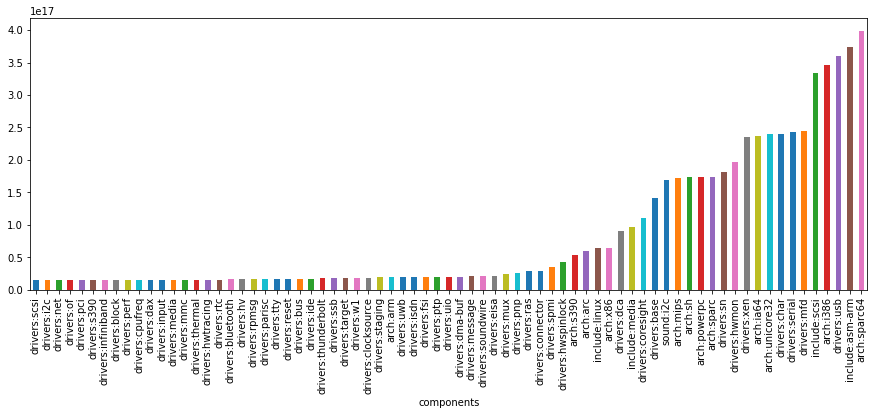

In [10]:
component_age.plot.bar(figsize=(15,5))